## Import

In [ ]:
!pip install yfinance
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 14.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import plot_yearly
import numpy as np

## Maximale Historie

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/6ajpbd_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/_b98fjqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95166', 'data', 'file=/tmp/tmpd1ki0xz6/6ajpbd_1.json', 'init=/tmp/tmpd1ki0xz6/_b98fjqf.json', 'output', 'file=/tmp/tmpd1ki0xz6/prophet_modely09sxm00/prophet_model-20230407214056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


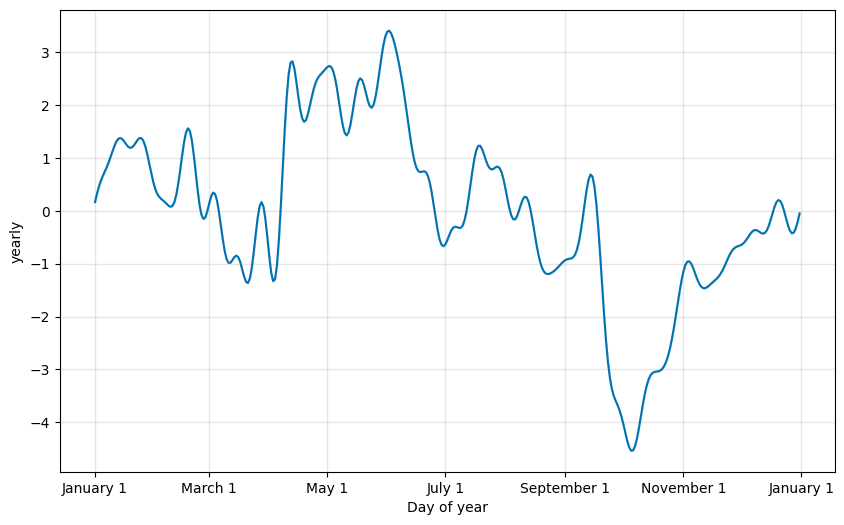

In [162]:
import yfinance as yf
from prophet import Prophet
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly

def get_stock_data(stock_name):
    stock = yf.Ticker(stock_name)
    df = stock.history(period="max")
    return df

df = get_stock_data("VOW3.DE")
df = df.reset_index()
df['ds'] = df['Date'].dt.tz_localize(None)
df = df[['ds', 'Close']].rename(columns={'Close': 'y'})

m = Prophet(yearly_seasonality=30).fit(df)
a = plot_yearly(m)

future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)

# Create the interactive forecast plot
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title='Price Forecast')

# Create the interactive component plots
fig2 = plot_components_plotly(m, forecast)

# Show the plots
fig1.show()
fig2.show()


## Jahresspanne A - B

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/9962_pkt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/yxyu7gfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18984', 'data', 'file=/tmp/tmpd1ki0xz6/9962_pkt.json', 'init=/tmp/tmpd1ki0xz6/yxyu7gfg.json', 'output', 'file=/tmp/tmpd1ki0xz6/prophet_modeli9eqz9n5/prophet_model-20230407164719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


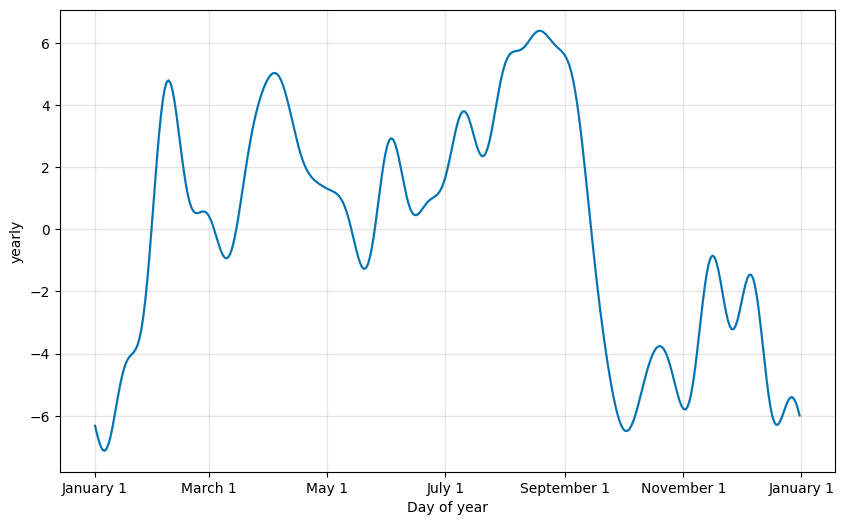

In [ ]:
def get_stock_data(stock_name, start_date, end_date):
    stock = yf.Ticker(stock_name)
    df = stock.history(start=start_date, end=end_date)
    return df

df = get_stock_data("GOOGL", "2020-01-01", "2023-04-06")
df = df.reset_index()
df['ds'] = df['Date'].dt.tz_localize(None)
df = df[['ds', 'Close']].rename(columns={'Close': 'y'})

m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)

# Create the interactive forecast plot
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title='Price Forecast')

# Create the interactive component plots
fig2 = plot_components_plotly(m, forecast)

# Show the plots
fig1.show()
fig2.show()


## Two stocks 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/59tac5om.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/gyqw7ae2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85967', 'data', 'file=/tmp/tmpd1ki0xz6/59tac5om.json', 'init=/tmp/tmpd1ki0xz6/gyqw7ae2.json', 'output', 'file=/tmp/tmpd1ki0xz6/prophet_modelvxaxu1hx/prophet_model-20230407170446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


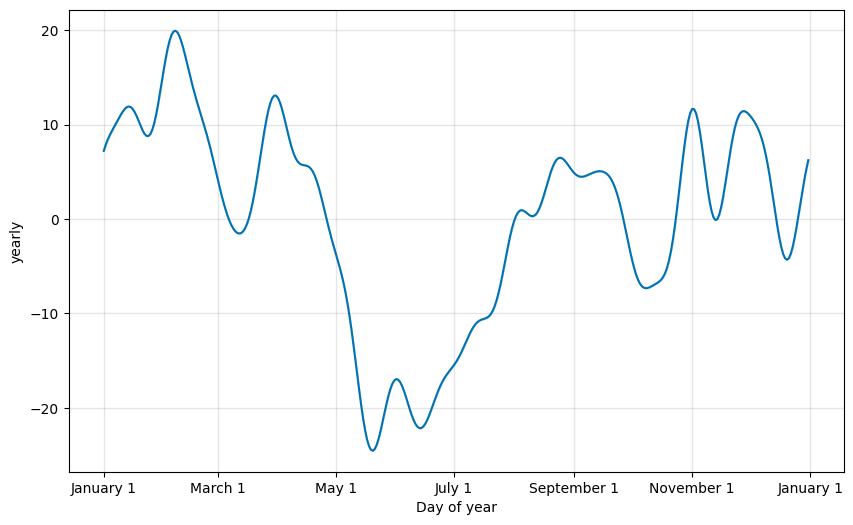

In [ ]:
import yfinance as yf
import pandas as pd

# Download first stock data
df1 = yf.download("TSLA", start="2020-01-01", end="2023-04-06")

# Download second stock data
df2 = yf.download("GOOGL", start="2020-01-01", end="2023-04-06")

# Concatenate both data frames
df = pd.concat([df1, df2], axis=0)

# Reset index and rename columns
df = df.reset_index()
df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

# Create future dataframe and predict
future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)

# Plot the forecast
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

fig1 = plot_plotly(m, forecast)
fig1.show()

fig2 = plot_components_plotly(m, forecast)
fig2.show()


## 10 - 100 combined stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DAI.DE: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*****

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/nxjj5b31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1ki0xz6/p7g5how7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73651', 'data', 'file=/tmp/tmpd1ki0xz6/nxjj5b31.json', 'init=/tmp/tmpd1ki0xz6/p7g5how7.json', 'output', 'file=/tmp/tmpd1ki0xz6/prophet_model1a8mtczd/prophet_model-20230407221722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


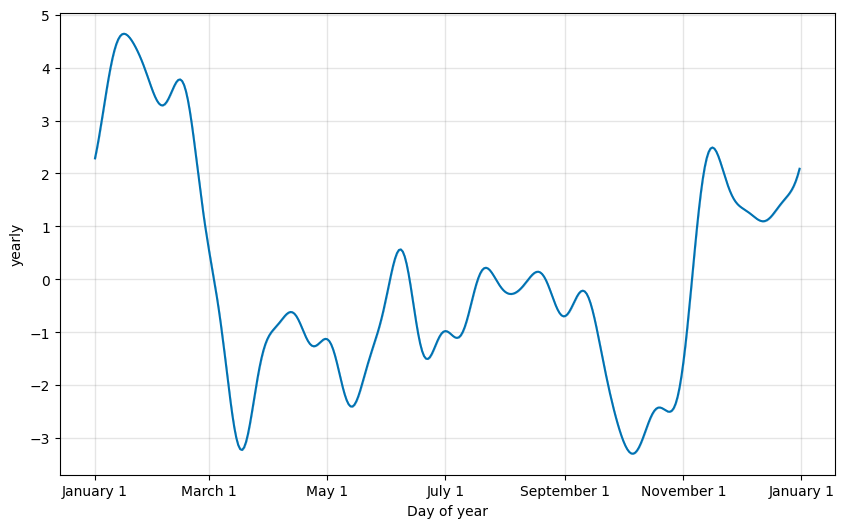

In [171]:
import yfinance as yf
import pandas as pd

# Define list of stock names
stock_names = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CON.DE', 'DAI.DE', 'DB1.DE', 'DBK.DE', 'DHER.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE', 'LIN.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SIE.DE', 'TKA.DE', 'VNA.DE', 'VOW3.DE']

# Download data for each stock and concatenate the dataframes
dfs = []
for stock_name in stock_names:
    df = yf.download(stock_name, start="2018-01-01", end="2023-04-06")
    df = df.reset_index()
    df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    dfs.append(df)
df = pd.concat(dfs, axis=0)


m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)
future = m.make_future_dataframe(periods=120)
forecast = m.predict(future)

from prophet.plot import plot_plotly, plot_components_plotly
fig1 = plot_plotly(m, forecast)
fig1.show()

fig2 = plot_components_plotly(m, forecast)
fig2.show()




## Below regression line (3 years)

In [173]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define function to get stock data
def get_stock_data(stock_name):
    stock = yf.Ticker(stock_name)
    df = stock.history(period="7y")
    return df

# Define function to calculate polynomial regression
def get_regression(df):
    x = np.arange(len(df))
    y = df['y'].values
    reg = np.polyfit(x, y, deg=4)
    return np.polyval(reg, x)

def get_linear_regression(df):
    x = np.arange(len(df))
    y = df['y'].values
    reg = np.polyfit(x, y, deg=1)
    return np.polyval(reg, x)

# Get stock data for TSLA
df = get_stock_data("^GDAXI")

# Calculate polynomial regression
df = df.reset_index()
df['ds'] = df['Date'].dt.tz_localize(None)
df = df[['ds', 'Close']].rename(columns={'Close': 'y'})
reg = get_regression(df)

# Calculate difference between actual values and regression line
diff = df['y'].values - reg

# Smooth the difference using Savitzky-Golay filter
diff_smoothed = savgol_filter(diff, 51, 3)

# Find the longest period the stock was below the regression line
max_below_reg = 0
max_below_reg_start_date = ''
current_below_reg = 0
current_below_reg_start_date = ''
for i in range(len(df)):
    if diff_smoothed[i] < 0:
        if current_below_reg == 0:
            current_below_reg_start_date = df['ds'][i].strftime('%Y-%m-%d')
        current_below_reg += 1
        if current_below_reg > max_below_reg:
            max_below_reg = current_below_reg
            max_below_reg_start_date = current_below_reg_start_date
    else:
        current_below_reg = 0

# Calculate linear regression
linear_reg = get_linear_regression(df)

# Create Plotly chart
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Stock'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['ds'], y=reg, mode='lines', name='Polynomial Regression'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['ds'], y=linear_reg, mode='lines', name='Linear Regression'), secondary_y=False)
#fig.add_trace(go.Scatter(x=df['ds'], y=diff_smoothed, mode='lines', name='Difference'), secondary_y=True)
fig.update_layout(title='The stock Regression Analysis', xaxis_title='Date', yaxis_title='Price')
fig.update_yaxes(title_text='Price', secondary_y=False)
fig.update_yaxes(title_text='Difference', secondary_y=True)
fig.show()


In [170]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define function to get stock data
def get_stock_data(stock_name):
    stock = yf.Ticker(stock_name)
    df = stock.history(period="10y")
    return df

# Define function to calculate polynomial regression
def get_regression(df):
    x = np.arange(len(df))
    y = df['Close'].values
    reg = np.polyfit(x, y, deg=4)
    return np.polyval(reg, x)

# Get stock data for NVDA
df = get_stock_data("^GDAXI")

# Calculate polynomial regression
df = df.reset_index()
df['ds'] = df['Date'].dt.tz_localize(None)
df['regression'] = get_regression(df)

# Calculate difference between actual values and regression line
df['diff'] = df['Close'] - df['regression']

# Find the longest period the stock was below the regression line
max_below_reg = 0
max_below_reg_start_date = ''
current_below_reg = 0
current_below_reg_start_date = ''
days_below_reg = 0
for i in range(len(df)):
    if df['Close'][i] < df['regression'][i]:
        if current_below_reg == 0:
            current_below_reg_start_date = df['ds'][i]
        current_below_reg += 1
        days_below_reg += 1
        if current_below_reg > max_below_reg:
            max_below_reg = current_below_reg
            max_below_reg_start_date = current_below_reg_start_date
    else:
        current_below_reg = 0

# Print the results
print('Je länger drunter desto besser')
print(f"The longest period under the line was {max_below_reg} days, starting on {max_below_reg_start_date.date()}.")
print(f"The total number of days the stock was below the regression line {days_below_reg}.")
print(f"The average number of days the stock was below the regression line was {days_below_reg/len(df):.2f} days per month.")



Je länger drunter desto besser
The longest period under the line was 257 days, starting on 2015-12-08.
The total number of days the stock was below the regression line 1251.
The average number of days the stock was below the regression line was 0.49 days per month.
